<a href="https://colab.research.google.com/github/RafBD/CursoIntroPython/blob/main/EjerciciosCO/Trans_aprendizaje_categorical_EfficientNetV2L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='orange'>**TRANSFERENCIA DE APRENDIZAJE:** </font>






In [ ]:
#Importar el modelo de interes
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2L
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/Dataset_TL_2/dataset_lp/train"
test_dir = "/content/drive/MyDrive/Dataset_TL_2/dataset_lp/test"

train_datagen = ImageDataGenerator(rescale=1/255., vertical_flip=True, rotation_range=100)

test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 50 images belonging to 5 classes.
Testing images:
Found 50 images belonging to 5 classes.


In [ ]:
imgs, labels = next(train_data)

In [ ]:
labels.shape

(32, 5)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

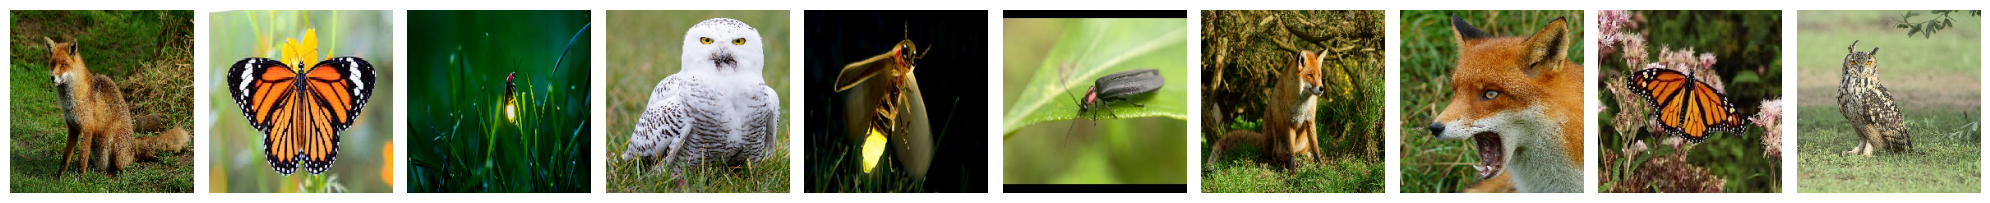

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)
# Etiquetas
# 0 => ajolotes 1=>ardillas 2=>cubrebocas 3=>orugas 4=>tacos

In [ ]:
# Al cargar un modelo dado, el argumento " include_top " se puede establecer en False,
# en cuyo caso las capas de salida totalmente conectadas (DENSE) del modelo utilizado no se cargarán,
# esto permite agregar y entrenar una nueva capa de salida.
pre_trained_model = EfficientNetV2L(input_shape=IMAGE_SIZE+(3,), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Se debe congelar el modelo base, es decir no se ajustarán los pesos del modelo base
pre_trained_model.trainable = False

### <font color='darkviolet'> **Definir utilizando Modelo Funcional de Keras para el entrenamiento**


In [ ]:
pre_trained_model.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
pre_trained_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Agregar nuevas capas utlizando la API funcional de KERAS
x = Flatten()(pre_trained_model.output)
x = Dense(2048, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='tanh')(x)
x = Dense(16, activation='sigmoid')(x)
predicciones = Dense(5, activation='softmax')(x)

In [ ]:
# Crear modelo
modelo = Model(inputs=pre_trained_model.input, outputs=predicciones)
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Compilar modelo
modelo.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# Entrenar modelo
history = modelo.fit(train_data, validation_data=test_data, epochs=100, batch_size=100)

Epoch 1/100
2/2 [==============================] - 43s 31s/step - loss: 1.8293 - accuracy: 0.2000 - val_loss: 1.7315 - val_accuracy: 0.2000
Epoch 2/100
2/2 [==============================] - 1s 1s/step - loss: 1.7062 - accuracy: 0.2000 - val_loss: 1.6824 - val_accuracy: 0.2000
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 1.6493 - accuracy: 0.2000 - val_loss: 1.6582 - val_accuracy: 0.2000
Epoch 4/100
2/2 [==============================] - 2s 905ms/step - loss: 1.6104 - accuracy: 0.2000 - val_loss: 1.6369 - val_accuracy: 0.2000
Epoch 5/100
2/2 [==============================] - 1s 1s/step - loss: 1.5808 - accuracy: 0.2000 - val_loss: 1.6250 - val_accuracy: 0.2000
Epoch 6/100
2/2 [==============================] - 1s 1s/step - loss: 1.5620 - accuracy: 0.3200 - val_loss: 1.6185 - val_accuracy: 0.2000
Epoch 7/100
2/2 [==============================] - 1s 885ms/step - loss: 1.5316 - accuracy: 0.2400 - val_loss: 1.5972 - val_accuracy: 0.2000
Epoch 8/100
2/2 [=========

In [ ]:
# Guardar el modelo en formato HDF5
modelo.save('/content/drive/MyDrive/Dataset_TL_2/modelenetv2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
img_path = '/content/drive/MyDrive/Dataset_TL_2/dataset_lp/test/orugas/oruga (18).jpeg'
#img_path = './dataset/test/ardilla/ardilla (11).jpg'

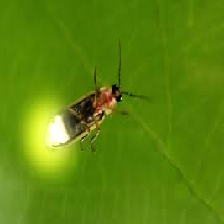

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
img

In [ ]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)
preds = modelo.predict(X)

1/1 [==============================] - 1s 1s/step


In [ ]:
preds.shape

(1, 5)

In [ ]:
preds

array([[0.10010173, 0.11938234, 0.19486886, 0.15448025, 0.4311668 ]],
      dtype=float32)

In [ ]:
np.argmax(preds, axis=1)

array([4])

In [ ]:
imgs, labels = next(test_data)

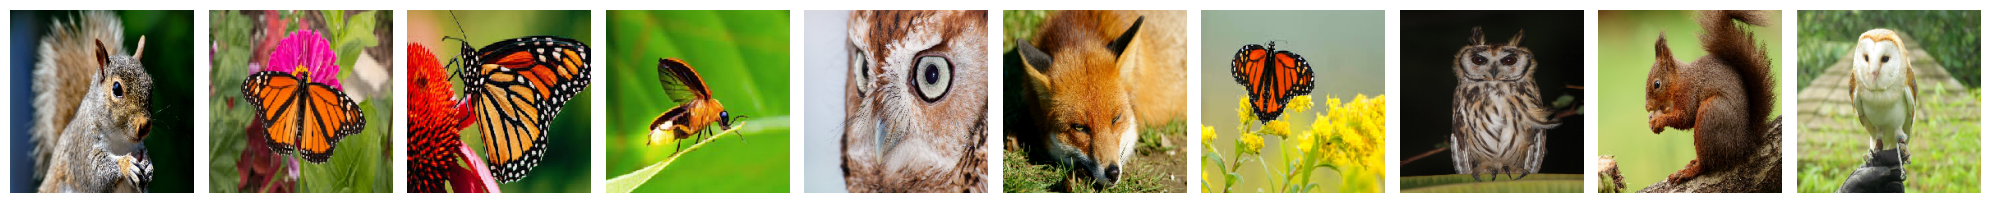

[[1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)
# Etiquetas
# 0 => ajolotes 1=>ardillas 2=>cubrebocas 3=>orugas 4=>tacos

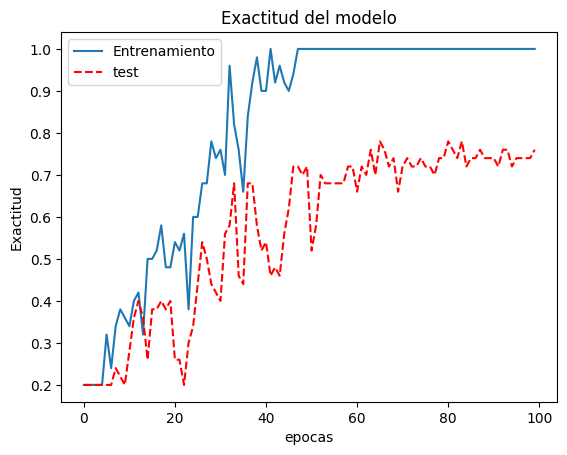

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

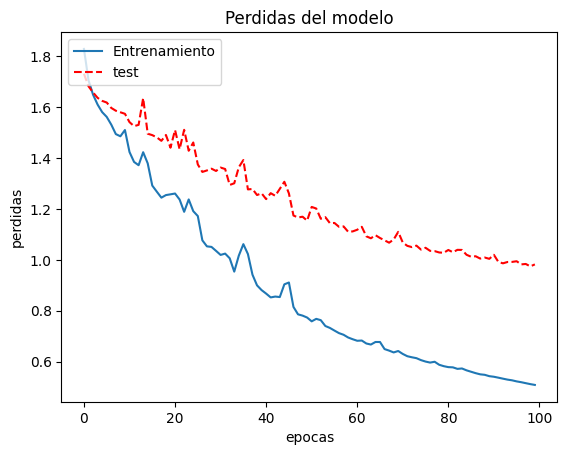

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

Liga de Drive con los modelos:
https://drive.google.com/drive/folders/19qHXdLjkQTqBC-sMkH-WAF5d86COVXbN?usp=drive_link